# EDA

**Análisis Exploratorio de Datos (EDA)**

En este análisis, nos enfocaremos en predecir cómo las variables del dataset pueden *influir en una segunda compra de un cliente*. Realizaremos un análisis exploratorio de datos para entender mejor las relaciones y patrones presentes en los datos.

## Librerias y Carga datos

In [2]:
#carga librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df=pd.read_csv("../data/raw/Propensity.csv")
df.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,Medio,NO DATA,No,NO,1376,0,True,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,Medio,SI,Averia muy grave,SI,2015,7256,True,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,Alto,NO DATA,No,NO,1818,0,True,3,21,3


## Exploración datos

**Variables Categóricas**
- **CODE**: Identificador único asignado a cada cliente.
- **PRODUCTO**: Tipo de producto adquirido por el cliente.
- **TIPO_CARROCERIA**: Clasificación de la carrocería del vehículo comprado.
- **COMBUSTIBLE**: Tipo de combustible utilizado por el vehículo.
- **Potencia**: Indicación del nivel de potencia del vehículo.
- **TRANS**: Tipo de transmisión que tiene el vehículo.
- **FORMA_PAGO**: Método de pago utilizado para la compra del vehículo.
- **ESTADO_CIVIL**: Estado civil del cliente en el momento de la compra.
- **GENERO**: Género del cliente registrado.
- **OcupaciOn**: Tipo de empleo o situación laboral del cliente.
- **Zona_Renta**: Nivel de renta asociado a la zona donde reside el cliente.
- **REV_Garantia**: Indica si el vehículo cuenta con una garantía activa.
- **Averia_grave**: Registro de si el vehículo ha presentado averías graves.
- **QUEJA_CAC**: Indica si el cliente ha presentado quejas al servicio de atención.
- **Mas_1_coche**: Señala si el cliente posee más de un vehículo.

**Variables Numéricas**
- **COSTE_VENTA**: Precio de venta del vehículo adquirido.
- **km_anno**: Cantidad de kilómetros recorridos por el vehículo en un año.
- **Revisiones**: Número de revisiones de mantenimiento realizadas al vehículo.
- **Edad_Cliente**: Edad del cliente al momento de la compra.
- **Tiempo**: Tiempo transcurrido desde la adquisición del vehículo o la relación con la marca.


In [9]:
df.shape

(58049, 24)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58049 entries, 0 to 58048
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CODE             58049 non-null  object
 1   PRODUCTO         58049 non-null  object
 2   TIPO_CARROCERIA  58049 non-null  object
 3   COMBUSTIBLE      58049 non-null  object
 4   Potencia         58049 non-null  object
 5   TRANS            58049 non-null  object
 6   FORMA_PAGO       58049 non-null  object
 7   ESTADO_CIVIL     57159 non-null  object
 8   GENERO           57189 non-null  object
 9   OcupaciOn        58049 non-null  object
 10  PROVINCIA        58049 non-null  object
 11  Campanna1        58049 non-null  object
 12  Campanna2        58049 non-null  object
 13  Campanna3        58049 non-null  object
 14  Zona_Renta       44871 non-null  object
 15  REV_Garantia     58049 non-null  object
 16  Averia_grave     58048 non-null  object
 17  QUEJA_CAC        58049 non-null

In [ ]:
#num de valores ínicos x col
df.nunique()

CODE               58049
PRODUCTO              11
TIPO_CARROCERIA        8
COMBUSTIBLE            2
Potencia               3
TRANS                  2
FORMA_PAGO             4
ESTADO_CIVIL           4
GENERO                 2
OcupaciOn              3
PROVINCIA             53
Campanna1              2
Campanna2              2
Campanna3              2
Zona_Renta             4
REV_Garantia           2
Averia_grave           4
QUEJA_CAC              2
COSTE_VENTA         2833
km_anno            21512
Mas_1_coche            2
Revisiones            14
Edad_Cliente          54
Tiempo                14
dtype: int64

In [18]:
#valores uncios en columnas categóricas
columns_of_interest = ["COMBUSTIBLE", "Potencia", "TRANS", "FORMA_PAGO", 
                       "ESTADO_CIVIL", "GENERO", "OcupaciOn", 
                       "Averia_grave", "Mas_1_coche"]
for col in columns_of_interest:
    print(f"Valores únicos en {col}:")
    print(df[col].unique())
    print("")

Valores únicos en COMBUSTIBLE:
['FUEL 1' 'FUEL 2']

Valores únicos en Potencia:
['Baja' 'Media' 'Alta']

Valores únicos en TRANS:
['M' 'A']

Valores únicos en FORMA_PAGO:
['Contado' 'Otros' 'Financiera Marca' 'Financiera Banco']

Valores únicos en ESTADO_CIVIL:
['CASADO' 'SOLTERO' 'OTROS' 'EN PAREJA' nan]

Valores únicos en GENERO:
['M' 'F' nan]

Valores únicos en OcupaciOn:
['Empresa' 'Funcionario' 'Autonomo']

Valores únicos en Averia_grave:
['Averia muy grave' 'No' 'Averia leve' 'Averia grave' nan]

Valores únicos en Mas_1_coche:
[False  True]



**Explicación tipo de pago**

-*Contado*: El cliente pagó el coche en su totalidad al momento de la compra, sin financiamiento.

-*Financiera Marca*: El cliente financió el coche a través de una entidad financiera afiliada a la marca del coche (por ejemplo, si compras un coche de Toyota y lo financias con "Toyota Financial Services").

-*Financiera Banco*: El cliente financió el coche a través de un banco o una entidad financiera independiente de la marca del coche.

In [24]:
# estadísticas básicas
df.describe()

,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Tiempo
count,58049.000000,58049.000000,58049.000000,58049.000000,58049.000000
mean,2540.125756,11805.893607,3.529587,47.351255,1.859119
std,1603.556511,10205.363971,2.528413,11.239984,3.091309
min,0.000000,0.000000,0.000000,18.000000,0.000000
25%,1595.000000,0.000000,1.000000,40.000000,0.000000
50%,2353.000000,11486.000000,3.000000,48.000000,0.000000
75%,3301.000000,17927.000000,5.000000,56.000000,4.000000
max,18455.000000,182331.000000,13.000000,71.000000,14.000000


## Detención Valores Nulos

In [ ]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  

ESTADO_CIVIL      890
GENERO            860
Zona_Renta      13178
Averia_grave        1
dtype: int64

In [32]:
missing_percentage = ((df.isnull().sum() / len(df)) * 100).round(3)
missing_percentage[missing_percentage > 0]


ESTADO_CIVIL     1.533
GENERO           1.482
Zona_Renta      22.702
Averia_grave     0.002
dtype: float64

**Análisis de valores nulos**

- *Evaluar la relación con `'Mas_1_coche'`* → Si los valores nulos siguen un patrón con la compra de más de un coche, los tratamos como información en lugar de eliminarlos.  

- *Clasificación según el porcentaje de nulos*:  
  - Menos del 5% (`'ESTADO_CIVIL'`, `'GENERO'`) → Imputar con la moda o "Desconocido".  
  - Más del 20% (`'Zona_Renta'`) → Analizar si es relevante para `'Mas_1_coche'`. Si lo es, imputar; si no, eliminar.  
  - Cercano a 0% (`'Averia_grave'`) → Se puede eliminar la fila sin impacto.  




## Gráficas


In [7]:
#paleta colores
colors_pal = ["skyblue", "midnightblue"]


### Distribucción de la segunda compra

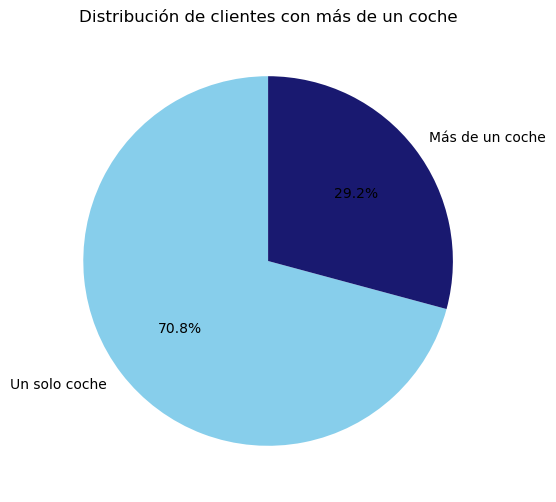

In [43]:

labels = ["Un solo coche", "Más de un coche"]

plt.figure(figsize=(6,6))
plt.pie(df["Mas_1_coche"].value_counts(), labels=labels, autopct="%1.1f%%", colors=colors_pal, startangle=90)
plt.title("Distribución de clientes con más de un coche")
plt.show()

### Variables numéricas

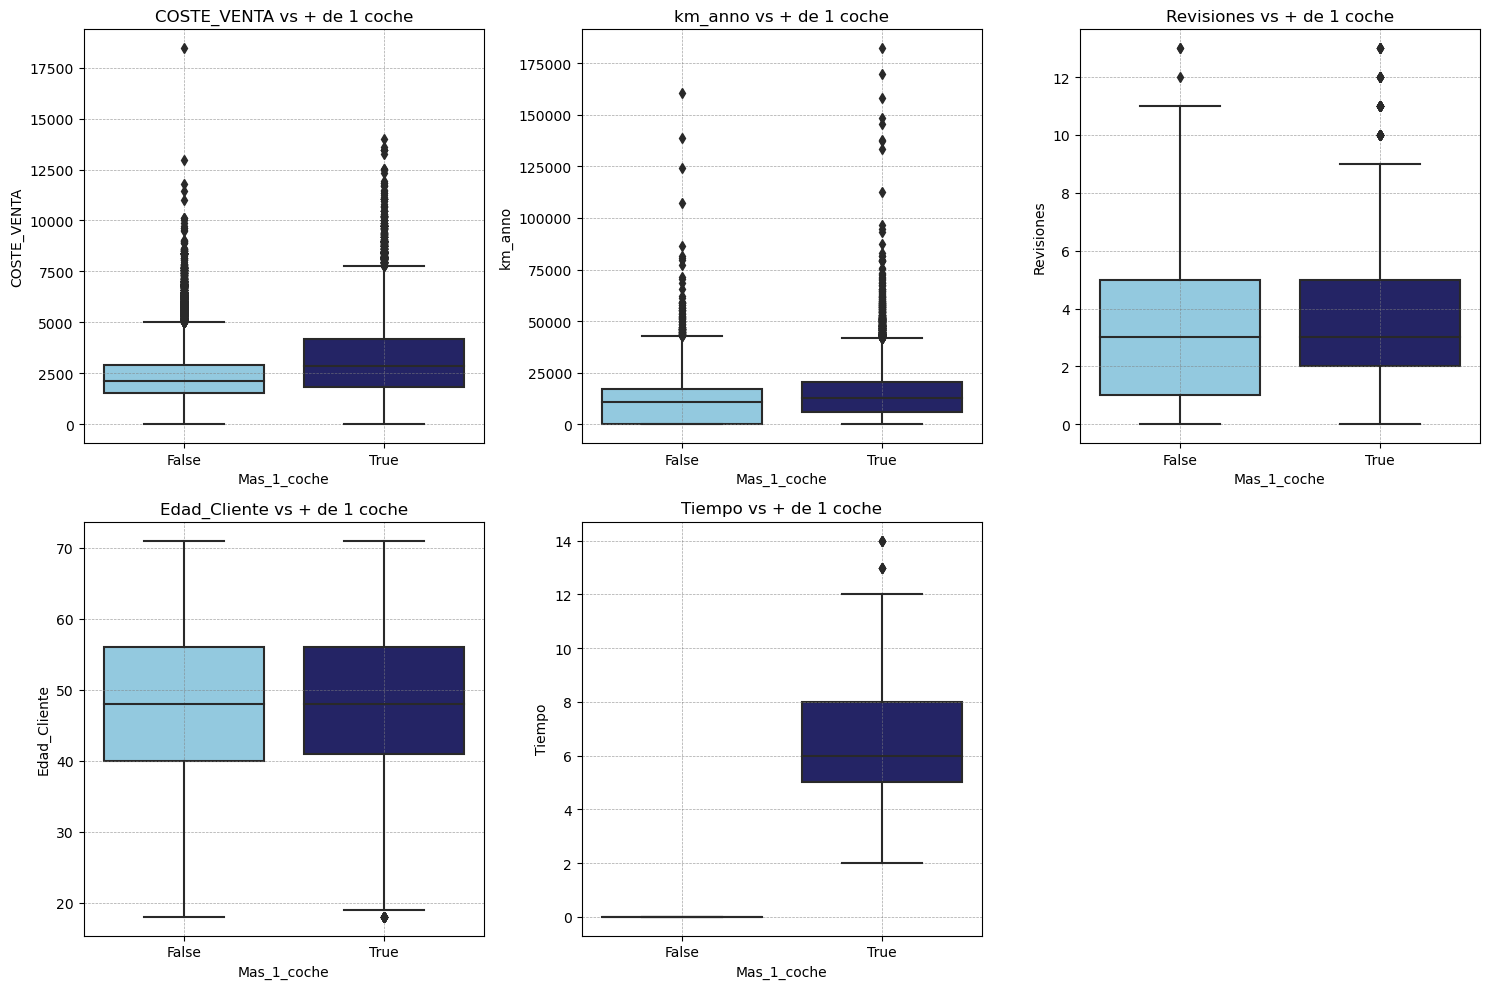

In [ ]:

fig, axes = plt.subplots(2,3, figsize=(15, 10))  

num_vars = ["COSTE_VENTA", "km_anno", "Revisiones", "Edad_Cliente", "Tiempo"]

for i, var in enumerate(num_vars):
    row, col = divmod(i, 3)  
    ax = axes[row, col]  
    
    sns.boxplot(x="Mas_1_coche", y=df[var], data=df, palette=["skyblue", "midnightblue"], ax=ax)
    ax.set_title(f"{var} vs + de 1 coche")
    ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

fig.delaxes(axes[1, 2])#eliminar cuadricula que nos sobra

plt.tight_layout()
plt.show()


**Análisis del Boxplot:**

- *COSTE_VENTA*: Los clientes que compraron más de un coche tienen descuentos más altos, lo que puede indicar que las empresas ofrecen mejores incentivos a clientes recurrentes.

- *km_anno*: Los clientes que compraron más de un coche tienen un kilometraje ligeramente más alto, lo que sugiere que estos clientes tienden a utilizar más sus vehículos.

- *Revisiones*: Las medianas son muy parecidas, pero los outliers en el grupo de los que compraron más de un coche son más pronunciados, lo que indica una mayor fidelidad y cuidado del vehículo en estos clientes.


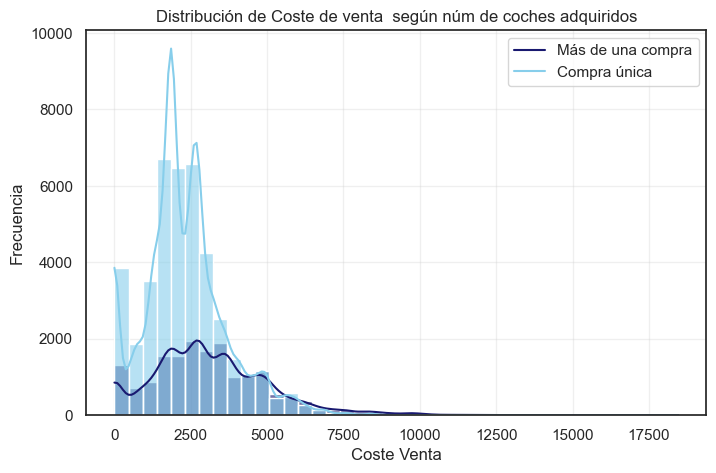

In [39]:
#Distribucción Coste_Venta(suma descuentos aplicados) según num de coches adquiridos
plt.figure(figsize=(8, 5))
sns.set(style="white")
sns.histplot(data=df, x="COSTE_VENTA", hue="Mas_1_coche", palette=colors_pal, bins=40, alpha=0.6, stat="count",kde=True)

plt.title("Distribución de Coste de venta  según núm de coches adquiridos")
plt.legend(labels=["Más de una compra", "Compra única"])
plt.xlabel("Coste Venta")
plt.ylabel("Frecuencia")
plt.grid(alpha=.3)
plt.show()

A partir de **5000 euros de descuento**, la mayoría de los clientes **compran más de un coche**, lo que indica que los **descuentos altos** son un **incentivo clave** para la compra repetida. 

Los clientes con **descuentos bajos** (por debajo de 5000 euros) tienden a hacer **solo una compra**.

Este patrón refleja la importancia de **descuentos significativos** para fidelizar a los clientes.


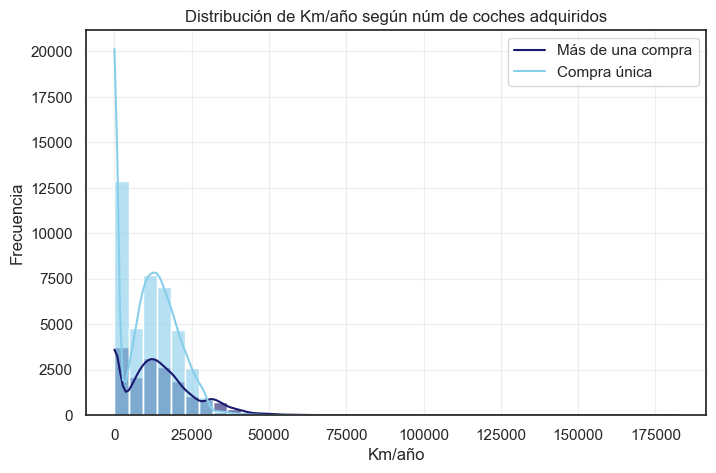

In [7]:
#Distribuccion Km/año según num coches adq
plt.figure(figsize=(8, 5))
sns.set(style="white")
sns.histplot(data=df, x="km_anno", hue="Mas_1_coche", palette=colors_pal, bins=40, alpha=0.6, stat="count",kde=True)

plt.title("Distribución de Km/año según núm de coches adquiridos")
plt.legend(labels=["Más de una compra", "Compra única"])
plt.xlabel("Km/año")
plt.ylabel("Frecuencia")
plt.grid(alpha=.3)
plt.show()

Los clientes que realizan **menos kilómetros al año** tienden a **no comprar más de un coche**, mientras que aquellos con **mayor kilometraje anual** son más propensos a **comprar más de un coche**, ya sea por **desgaste** o **preferencia por actualizar** su vehículo.


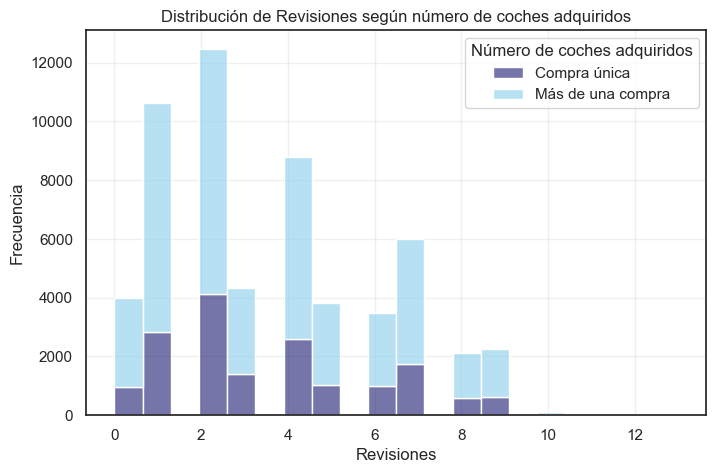

In [8]:
plt.figure(figsize=(8,5))
sns.set(style="white")
sns.histplot(data=df, x='Revisiones', hue='Mas_1_coche', multiple="stack", palette=colors_pal, bins=20,alpha=0.6)

plt.grid(alpha=0.3)
plt.title('Distribución de Revisiones según número de coches adquiridos')
plt.xlabel('Revisiones')
plt.ylabel('Frecuencia')
plt.legend(title="Número de coches adquiridos", labels=["Compra única", "Más de una compra"])

plt.show()


El gráfico de **Revisiones** muestra que los clientes con **altos números de revisiones** (más de 10) están más **asociados a la compra de más de un coche**. Esto sugiere que los clientes más comprometidos con el mantenimiento de su vehículo tienen una mayor probabilidad de comprar más de un coche. Por lo tanto, al analizar los clientes con **más de 10 revisiones**, podemos confirmar que estos valores altos son un **indicador de fidelidad y propensión a la compra repetida**.


In [170]:
high_revisiones = df[df['Revisiones'] > 10]


high_revisiones_info = high_revisiones[['Revisiones', 'Mas_1_coche']].groupby(['Revisiones', 'Mas_1_coche']).size()
high_revisiones_info


Revisiones  Mas_1_coche
11          False          18
            True           34
12          False           1
            True           10
13          False           2
            True            6
dtype: int64

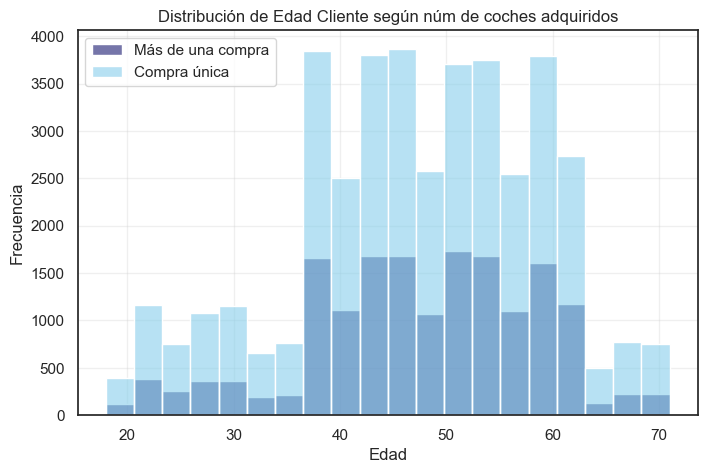

In [40]:
#Gráfico Km/año relacionado coches adq
plt.figure(figsize=(8, 5))
sns.set(style="white")
sns.histplot(data=df, x="Edad_Cliente", hue="Mas_1_coche", palette=colors_pal, bins=20, alpha=0.6, stat="count")

plt.title("Distribución de Edad Cliente según núm de coches adquiridos")
plt.legend(labels=["Más de una compra", "Compra única"])
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(alpha=.3)
plt.show()

La *edad del cliente* **no parece tener una gran influencia** sobre la compra de más de un coche, ya que la distribución es bastante similar entre los grupos.

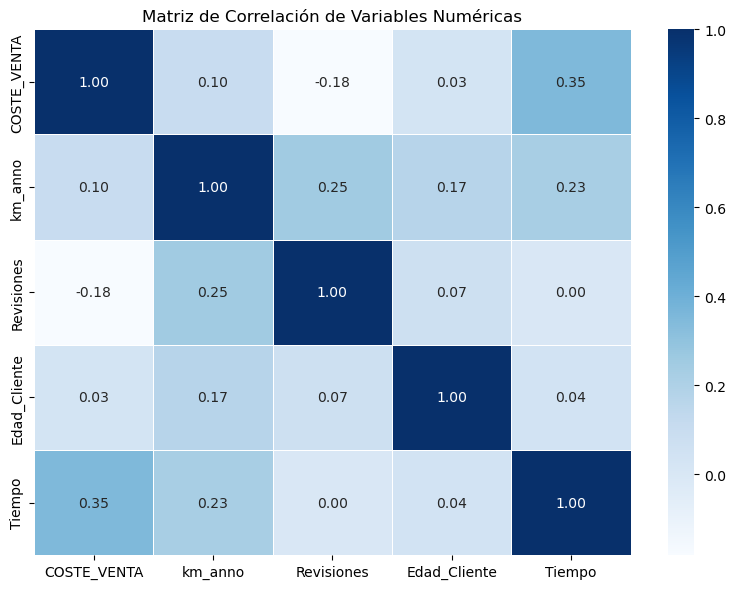

In [ ]:
#matriz de correlación
numeric_columns = df.select_dtypes(include=['number']).columns
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()



**Análisis de Matriz de Correlación**
1. *`COSTE_VENTA`* y *`Tiempo`* **(0.35)**:
   - A medida que pasa más tiempo entre las compras de los clientes, es más probable que opten por vehículos más caros o de gama más alta. Los clientes que compran con mayor frecuencia tienden a gastar más en cada compra.

2. *`km_anno`* y *`Revisiones`* **(0.25)**:
   - Los vehículos que recorren más kilómetros anuales requieren más revisiones. A mayor uso del coche, mayor necesidad de mantenimiento.

3. *`Tiempo`* y *`km_anno`* **(0.23)**:
   - Los clientes que compran más frecuentemente tienden a recorrer más kilómetros anuales. Esto sugiere que los compradores recurrentes están más involucrados en actividades que requieren mayor movilidad, como viajes o trabajo.





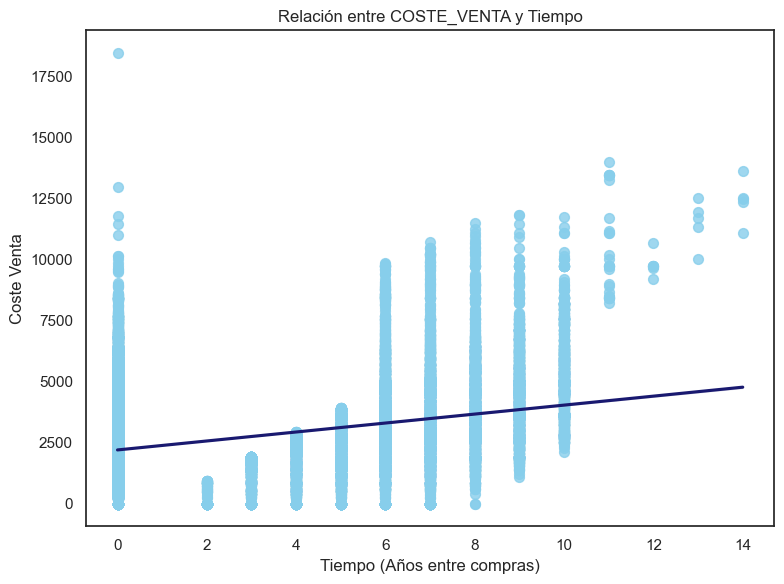

In [9]:
#coste de venta y tiempo
plt.figure(figsize=(8, 6))
sns.regplot(x='Tiempo', y='COSTE_VENTA', data=df, scatter_kws={'color': 'skyblue', 's': 50}, line_kws={'color': 'midnightblue'})
plt.title('Relación entre COSTE_VENTA y Tiempo')
plt.xlabel('Tiempo (Años entre compras)')
plt.ylabel('Coste Venta')
plt.tight_layout()
plt.show()


La línea de regresión (en azul oscuro) indica una **tendencia positiva** entre *COSTE_VENTA y Tiempo*. Esto significa que, en general, a medida que pasa más tiempo entre las compras, los clientes tienden a gastar más en el vehículo que adquieren.


#

### Variables Categóricas

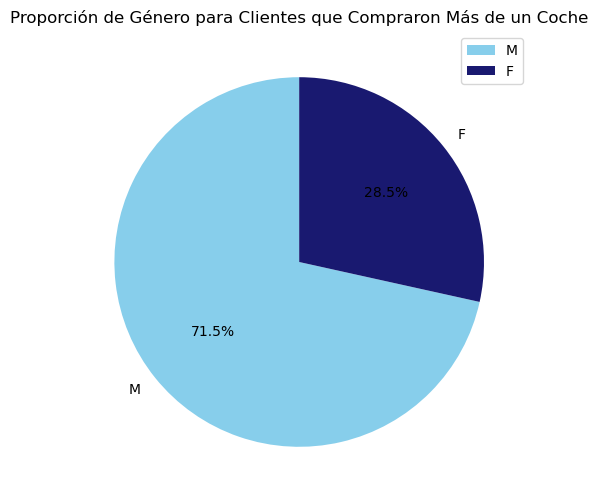

In [18]:
#Más de un coche y genero 
df_multiple_cars = df[df['Mas_1_coche'] == True]
gender_multiple_cars = df_multiple_cars['GENERO'].value_counts()


plt.figure(figsize=(6, 6))
gender_multiple_cars.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors_pal, legend=True)
plt.title('Proporción de Género para Clientes que Compraron Más de un Coche')
plt.ylabel('') 
plt.show()


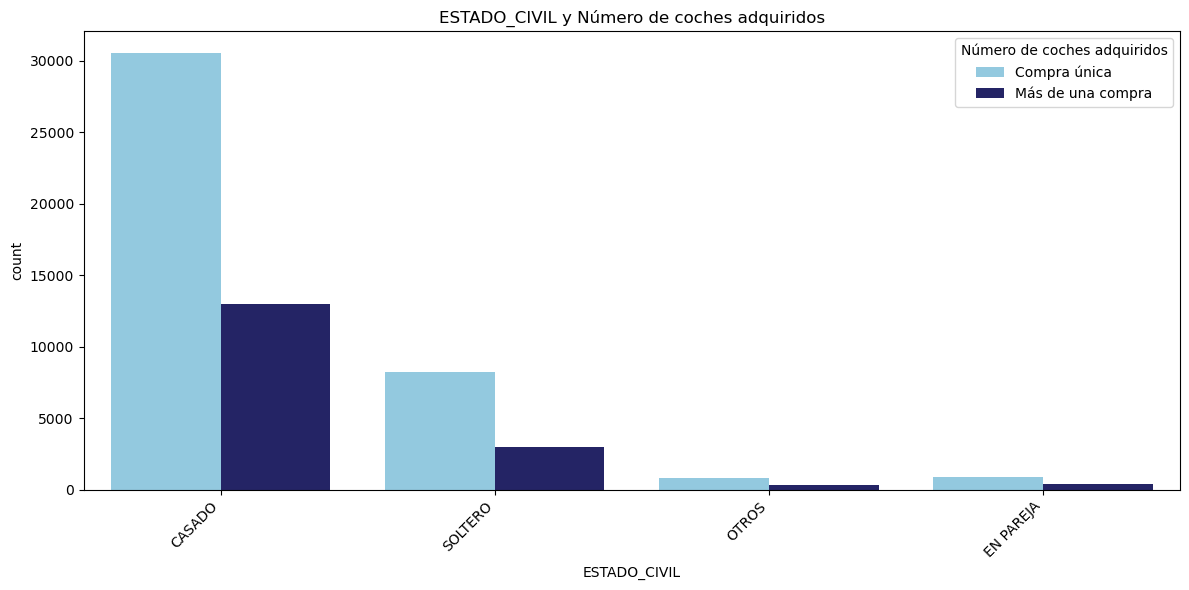

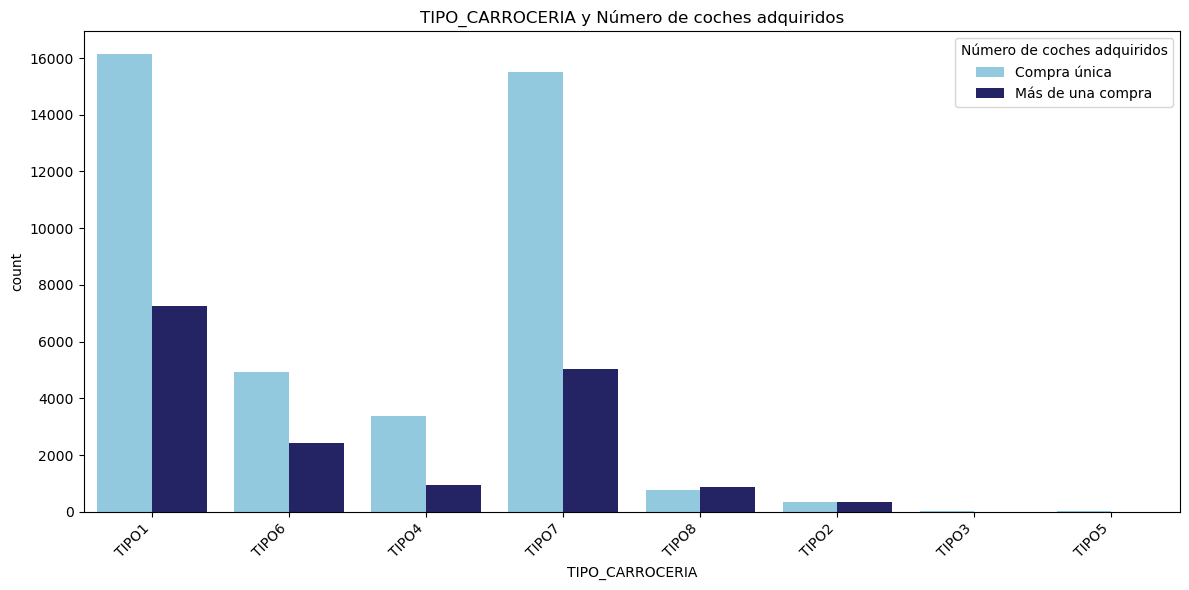

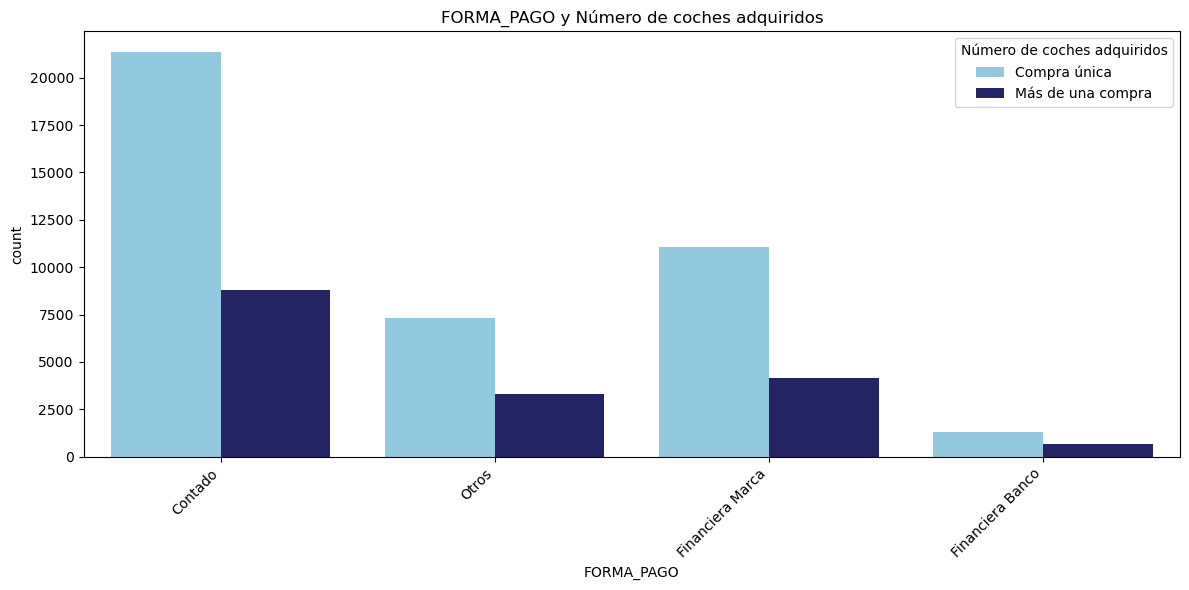

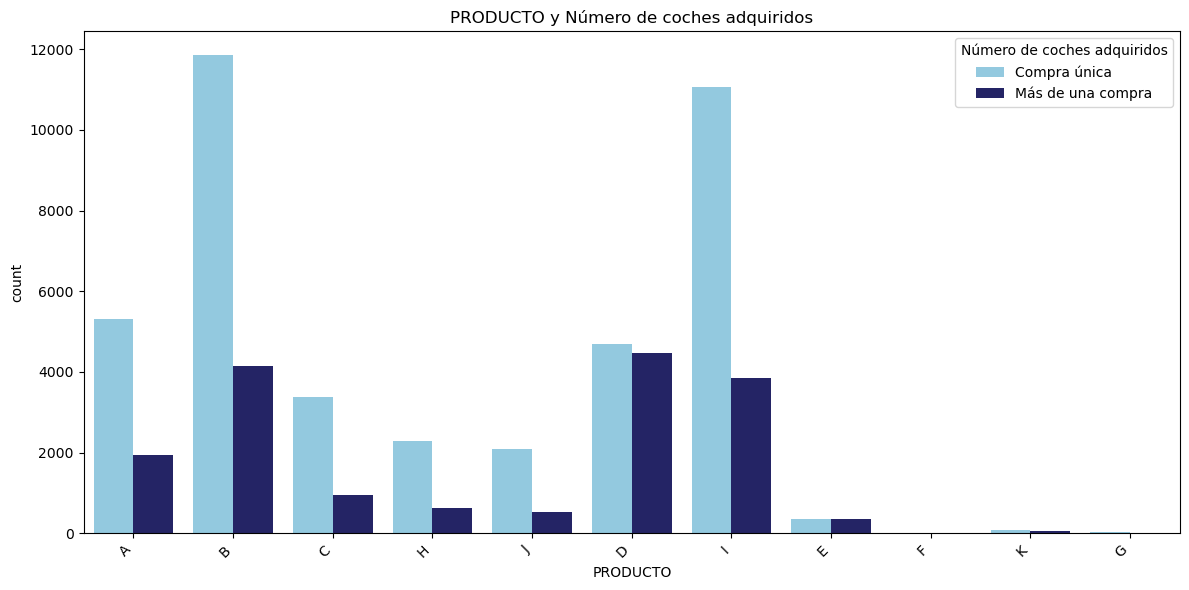

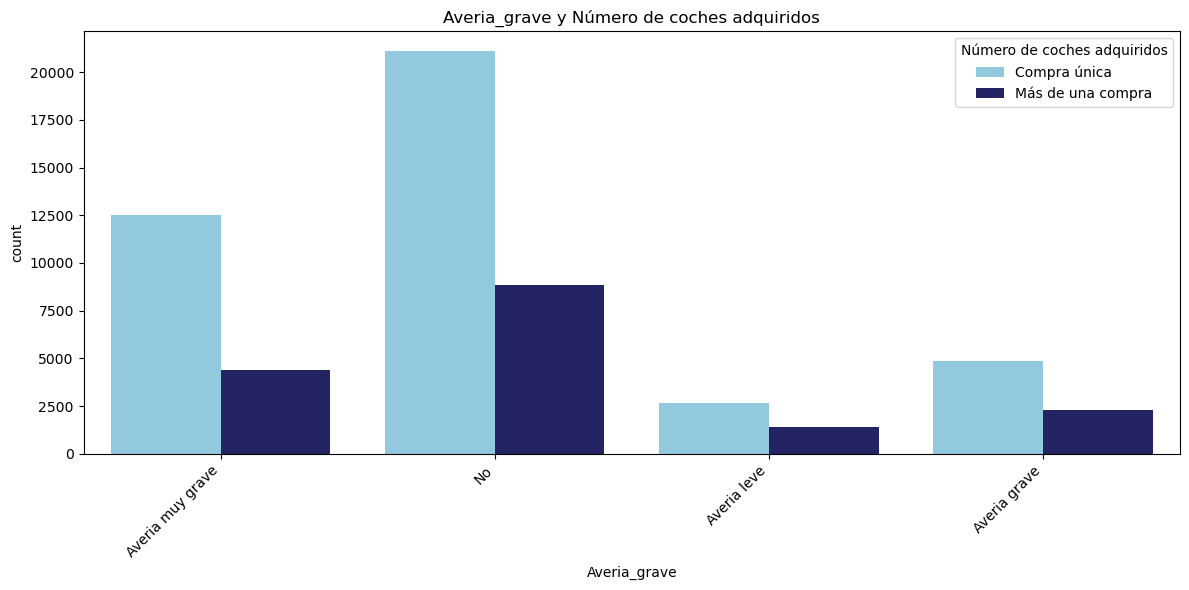

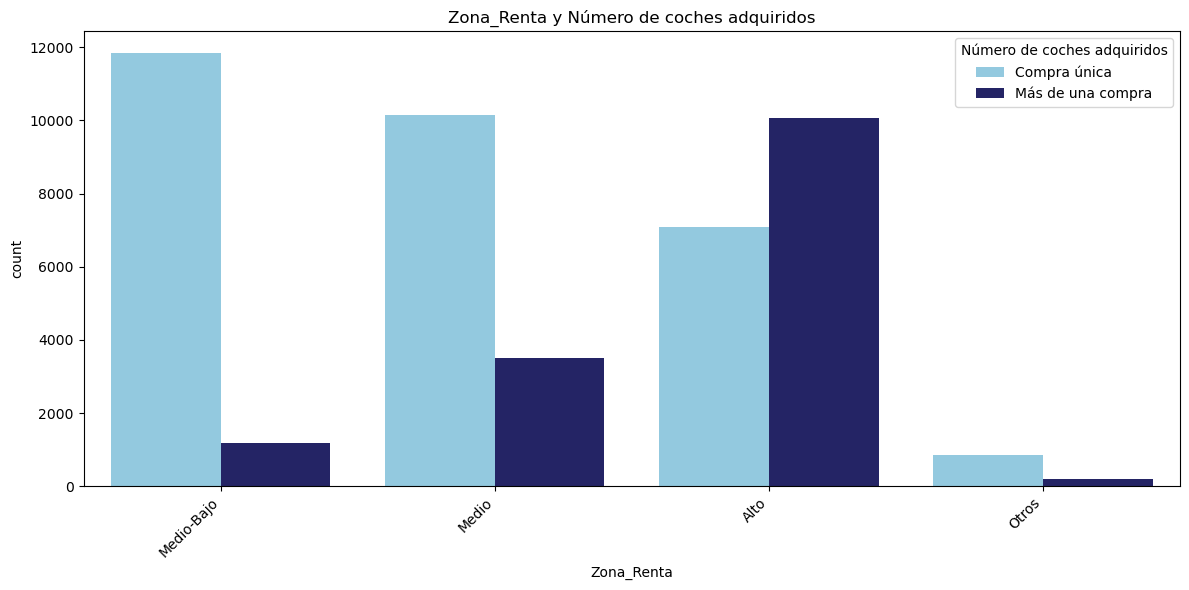

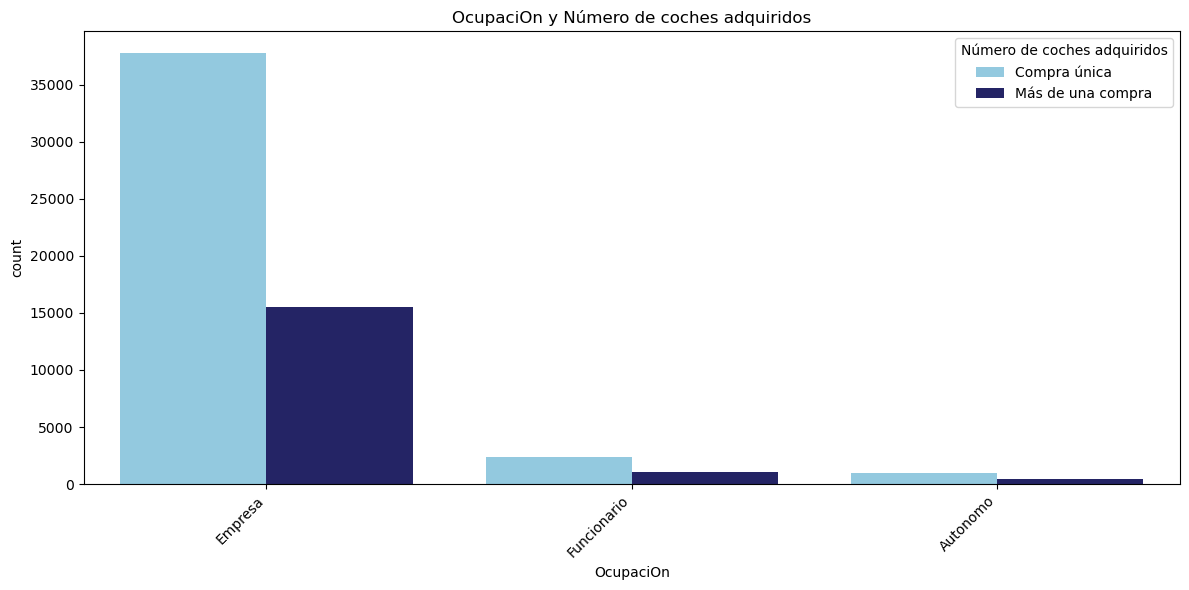

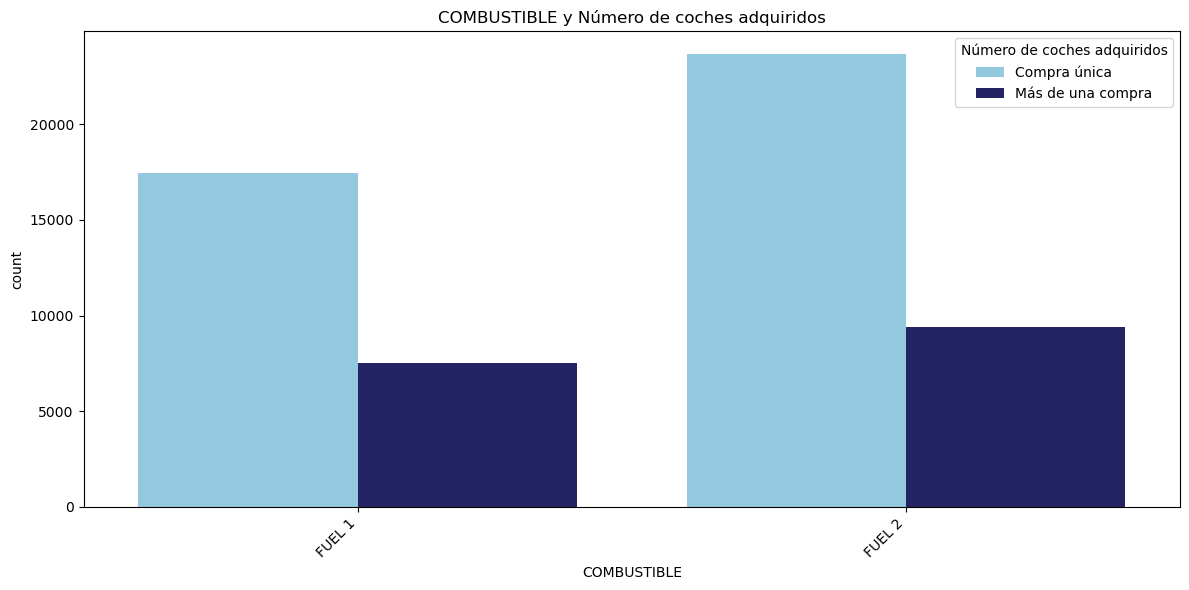

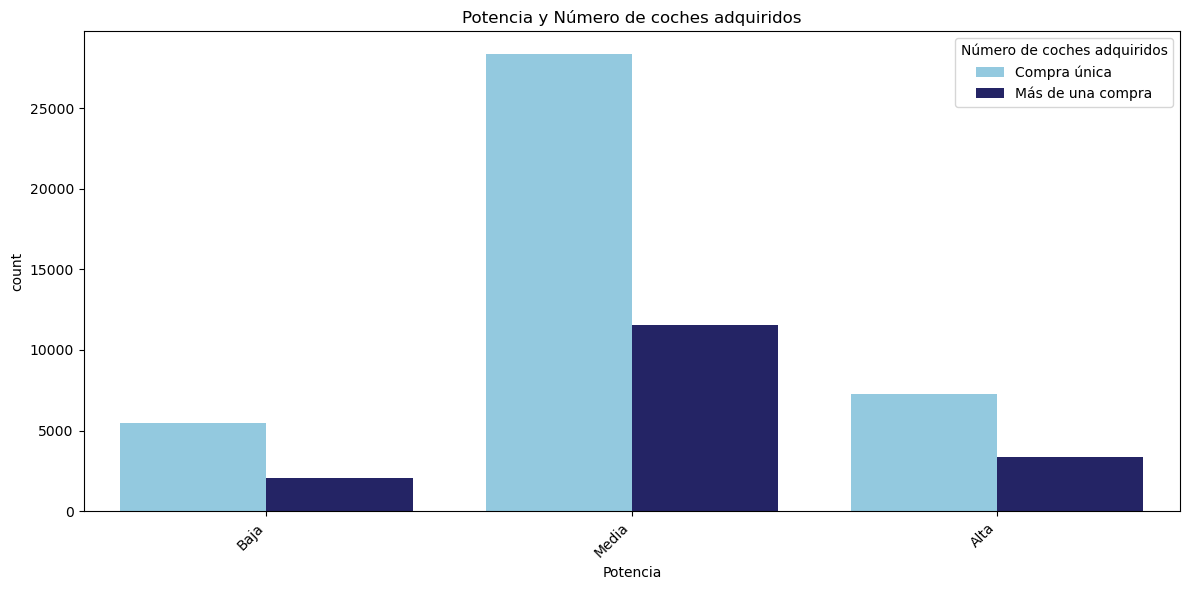

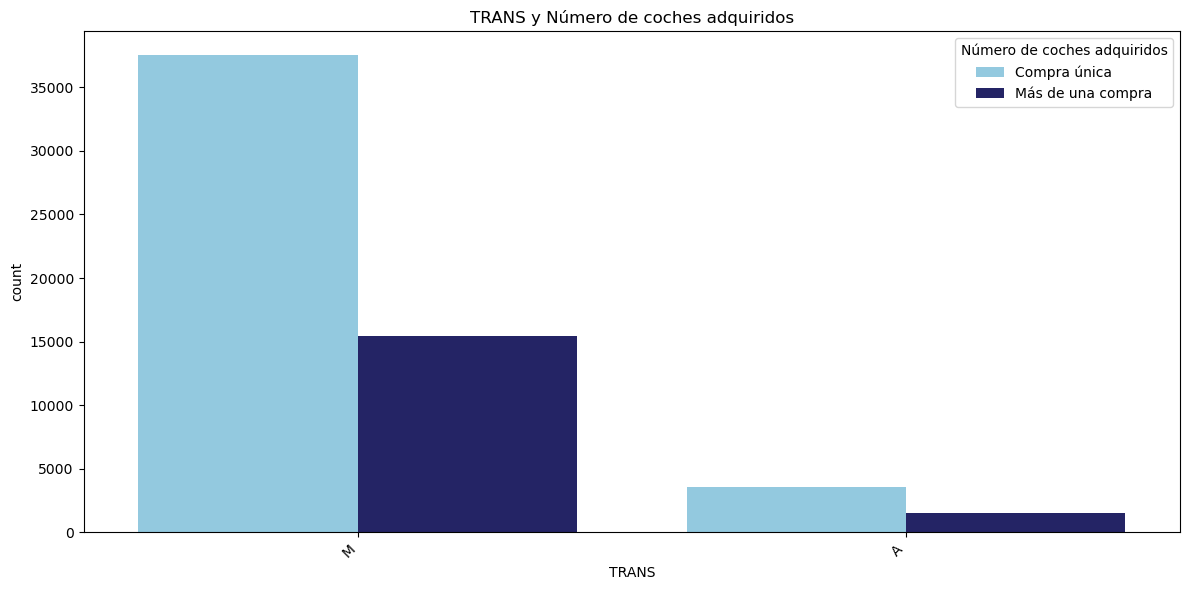

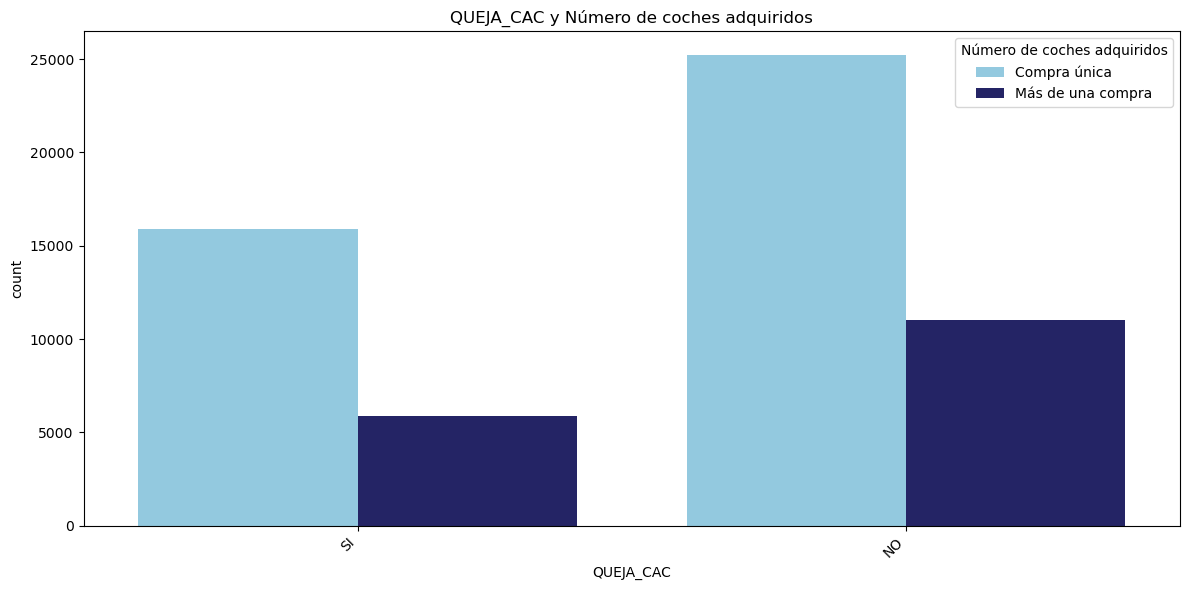

In [19]:
def plot_categorical_distribution(df, categorical_column, target_column='Mas_1_coche', palette=["skyblue", "midnightblue"]):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=categorical_column, hue=target_column, data=df, palette=palette)
    plt.title(f'{categorical_column} y Número de coches adquiridos')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Número de coches adquiridos', labels=["Compra única", "Más de una compra"])
    plt.tight_layout()
    plt.show()

# Variables a analizar
categorical_columns = ['ESTADO_CIVIL', 'TIPO_CARROCERIA', 'FORMA_PAGO', 
                       'PRODUCTO', 'Averia_grave', 'Zona_Renta', 'OcupaciOn','COMBUSTIBLE','Potencia','TRANS','QUEJA_CAC']

# Aplicar la función a todas las variables categóricas
for column in categorical_columns:
    plot_categorical_distribution(df, column)


*Análissi de variables categóricas*

- *Estado Civil*: Los casados son los que más compran. 30.92% de los casados compran más de un coche.
- *Tipo de Carrocería*: Predominan los tipos *TIPO1* y *TIPO8*.
- *Forma de Pago*: Mayoría al contado. 33.8% compran más de un coche.
- *Producto*: El *D-I.B* es el más comprado por los que compran más de un coche.
- *Avería Grave*: Generalmente no tienen averías graves los que compran más de un coche.
- *Zona de Renta*: Predominan zonas de renta alta. 58.75% de los de renta alta compran más de un coche.
- *Ocupació**: La mayoría son empleados en empresas.
- *Combustible*: No es determinante.
- *Potencia*: Predominan los coches de potencia media.
- *Transmisión*: La mayoría tiene transmisión manual.
- *Queja al CAC*: No suelen tener quejas los que mas compran.


## Estudio Geográfico

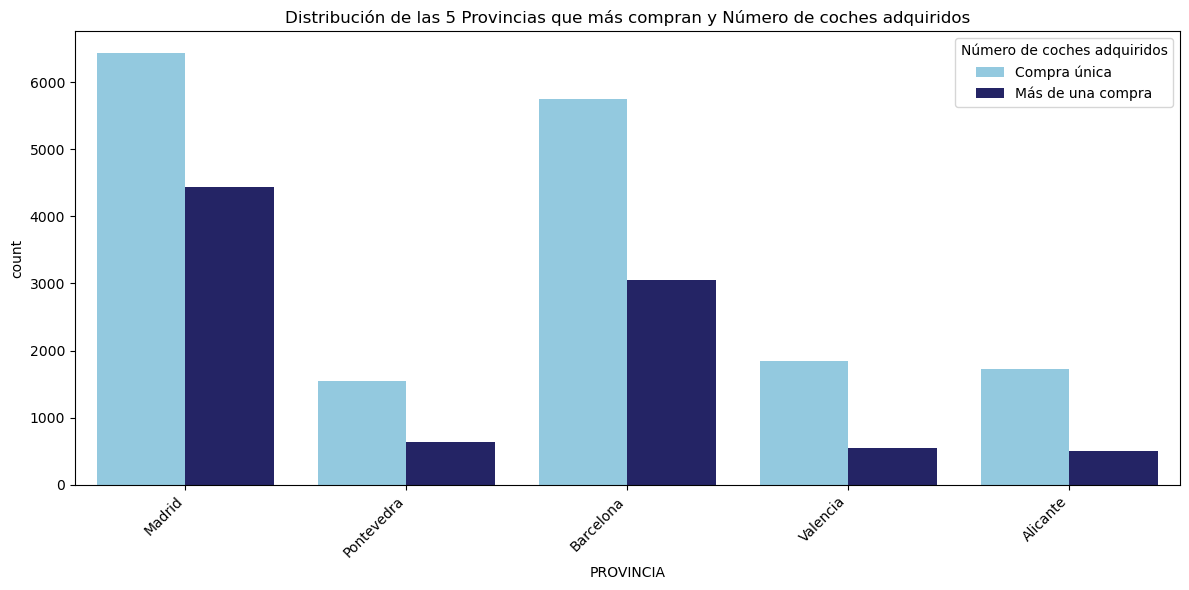

In [ ]:
#5 provincias que más compran
top_5_provinces = df['PROVINCIA'].value_counts().head(5).index
top_5_provinces_data = df[df['PROVINCIA'].isin(top_5_provinces)]

plt.figure(figsize=(12, 6))
sns.countplot(x='PROVINCIA', hue='Mas_1_coche', data=top_5_provinces_data, palette=colors_pal)
plt.title('Distribución de las 5 Provincias que más compran y Número de coches adquiridos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Número de coches adquiridos', labels=["Compra única", "Más de una compra"])
plt.tight_layout()
plt.show()


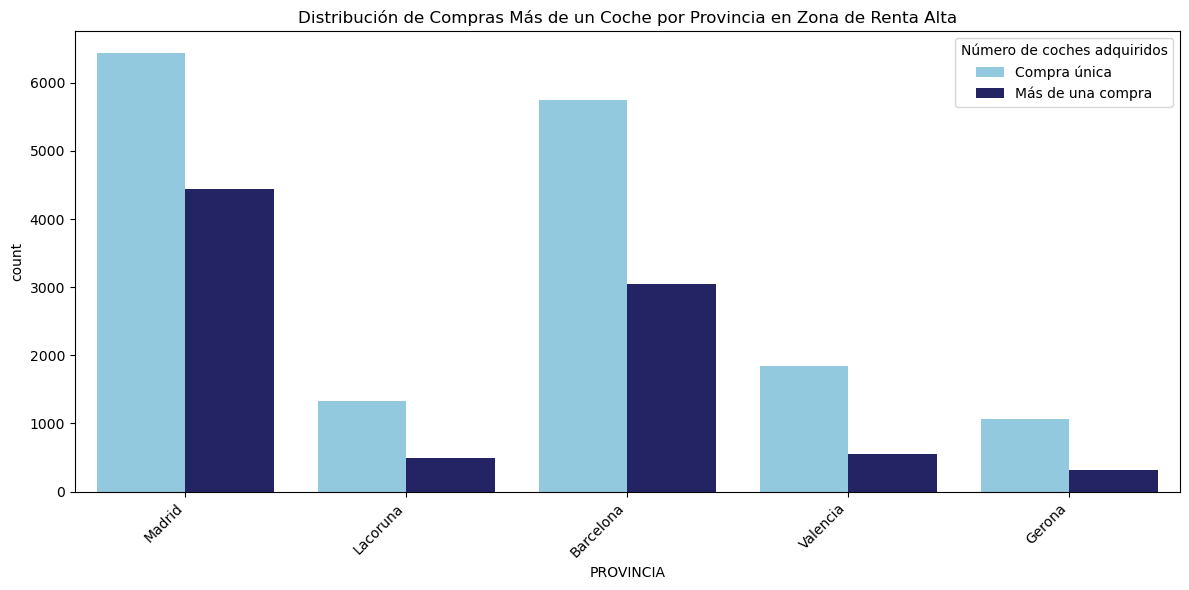

In [28]:
#5 provincias con renta más alta y coches adquirdos
province_rent_distribution = df.groupby('PROVINCIA')['Zona_Renta'].value_counts().unstack().fillna(0)
provinces_rent_high_values = province_rent_distribution['Alto']
top_5_provinces_rent_high = provinces_rent_high_values.sort_values(ascending=False).head(5)
top_5_provinces_rent_high_data = df[df['PROVINCIA'].isin(top_5_provinces_rent_high.index)]

plt.figure(figsize=(12, 6))
sns.countplot(x='PROVINCIA', hue='Mas_1_coche', data=top_5_provinces_rent_high_data, palette=["skyblue", "midnightblue"])
plt.title('Distribución de Compras Más de un Coche por Provincia en Zona de Renta Alta')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Número de coches adquiridos', labels=["Compra única", "Más de una compra"])
plt.tight_layout()
plt.show()


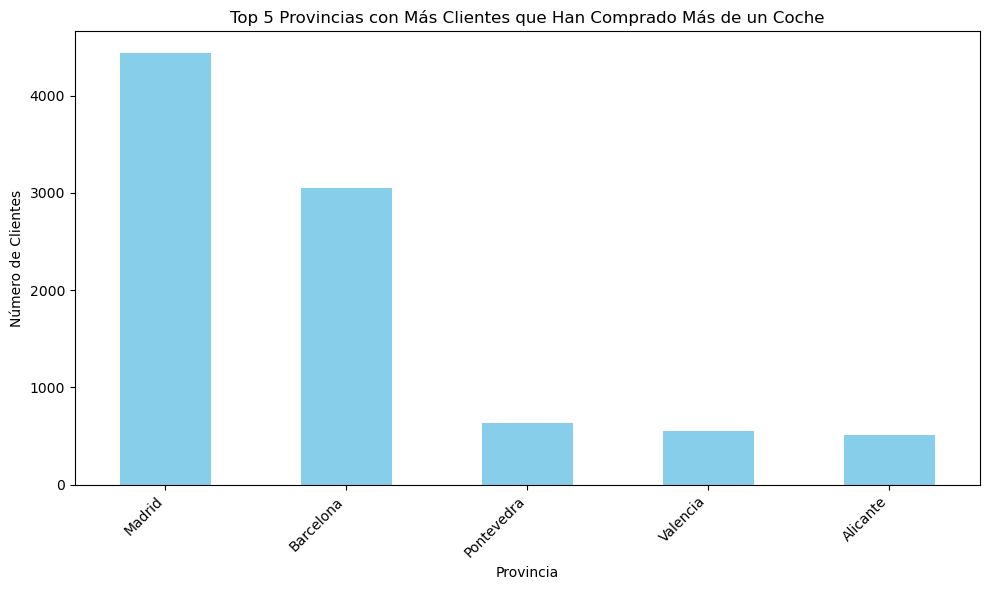

In [30]:

provinces_multiple_cars = df[df['Mas_1_coche'] == True].groupby('PROVINCIA').size().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
provinces_multiple_cars.plot(kind='bar', color="skyblue")
plt.title('Top 5 Provincias con Más Clientes que Han Comprado Más de un Coche')
plt.xlabel('Provincia')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Campañas

A continuación ,vamos a hacer dos gráficos para evaluar el **impacto de las campañas** sobre las segundas compras:
- Tasa de clientes que compraron más de un coche habiendo participado en camapañas
- Tasa de clientes que compraron más de un coche no habiendo participado en estas

Clientes que partiparon en las Campañas:

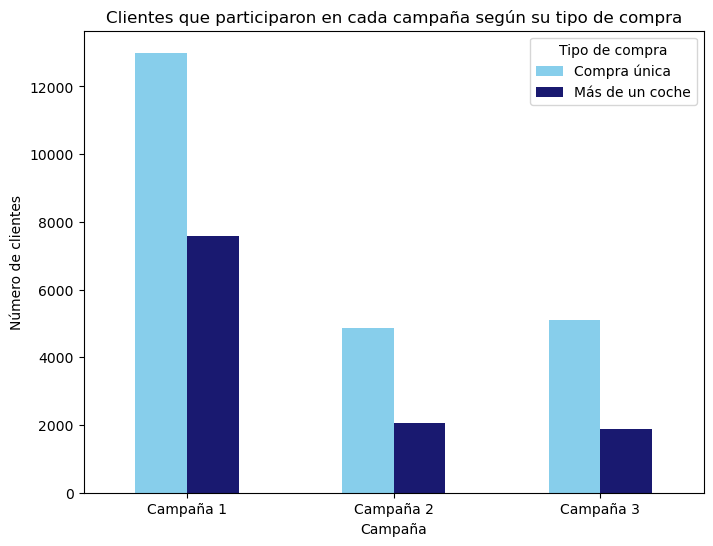

In [ ]:
# Convertir las columnas de campañas a valores numéricos (1 para 'SI', 0 para 'NO')
campanas = ["Campanna1", "Campanna2", "Campanna3"]
df[campanas] = df[campanas].applymap(lambda x: 1 if x == "SI" else 0)

df["Mas_1_coche"] = df["Mas_1_coche"].astype(int)

# Filtrar solo los clientes que participaron en al menos una campaña
clientes_participantes = df[(df["Campanna1"] == 1) | (df["Campanna2"] == 1) | (df["Campanna3"] == 1)]

campana_data = clientes_participantes.melt(id_vars=["CODE", "Mas_1_coche"], value_vars=campanas, var_name="Campaña", value_name="Participó")

campana_data = campana_data[campana_data["Participó"] == 1]

campana_counts = campana_data.groupby(["Campaña", "Mas_1_coche"])["CODE"].count().unstack().fillna(0)

# Graficar con barras agrupadas
fig, ax = plt.subplots(figsize=(8, 6))
campana_counts.plot(kind="bar", color=colors_pal, ax=ax)

ax.set_title("Clientes que participaron en cada campaña según su tipo de compra")
ax.set_ylabel("Número de clientes")
ax.set_xlabel("Campaña")
ax.set_xticklabels(["Campaña 1", "Campaña 2", "Campaña 3"], rotation=0)
ax.legend(["Compra única", "Más de un coche"], title="Tipo de compra")

plt.show()


Clientes que no participaron en las campañas:

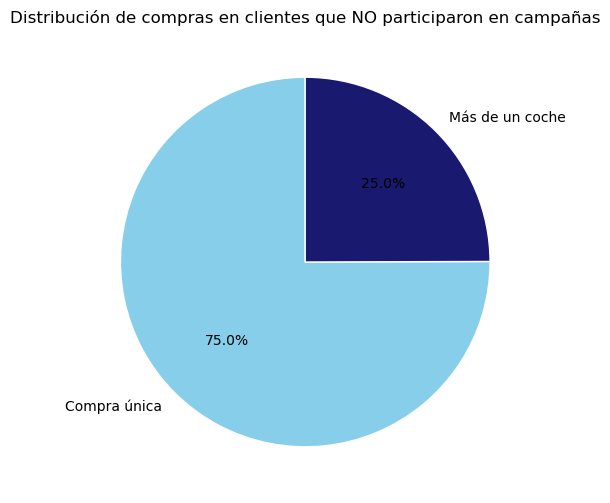

In [24]:
clientes_no_participantes = df[(df["Campanna1"] == 0) & (df["Campanna2"] == 0) & (df["Campanna3"] == 0)]

# Contar la cantidad de clientes que compraron un solo coche o más de uno
no_campana_counts = clientes_no_participantes["Mas_1_coche"].value_counts()

labels = ["Compra única", "Más de un coche"]
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(no_campana_counts, labels=labels, autopct='%1.1f%%', colors=colors_pal, startangle=90, wedgeprops={'edgecolor': 'white'})

ax.set_title("Distribución de compras en clientes que NO participaron en campañas")

plt.show()
